In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

In [3]:
df = pd.read_csv("./dataset/long_data_.csv")
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [4]:
df["Dates"] = pd.to_datetime(df["Dates"], dayfirst=True)
df["year"] = df["Dates"].dt.year
df["month"] = df["Dates"].dt.month
df["day"] = df["Dates"].dt.day
df.head()

,States,Regions,latitude,longitude,Dates,Usage,year,month,day
0,Punjab,NR,31.519974,75.980003,2019-01-02,119.9,2019,1,2
1,Haryana,NR,28.450006,77.019991,2019-01-02,130.3,2019,1,2
2,Rajasthan,NR,26.449999,74.639981,2019-01-02,234.1,2019,1,2
3,Delhi,NR,28.669993,77.230004,2019-01-02,85.8,2019,1,2
4,UP,NR,27.599981,78.050006,2019-01-02,313.9,2019,1,2


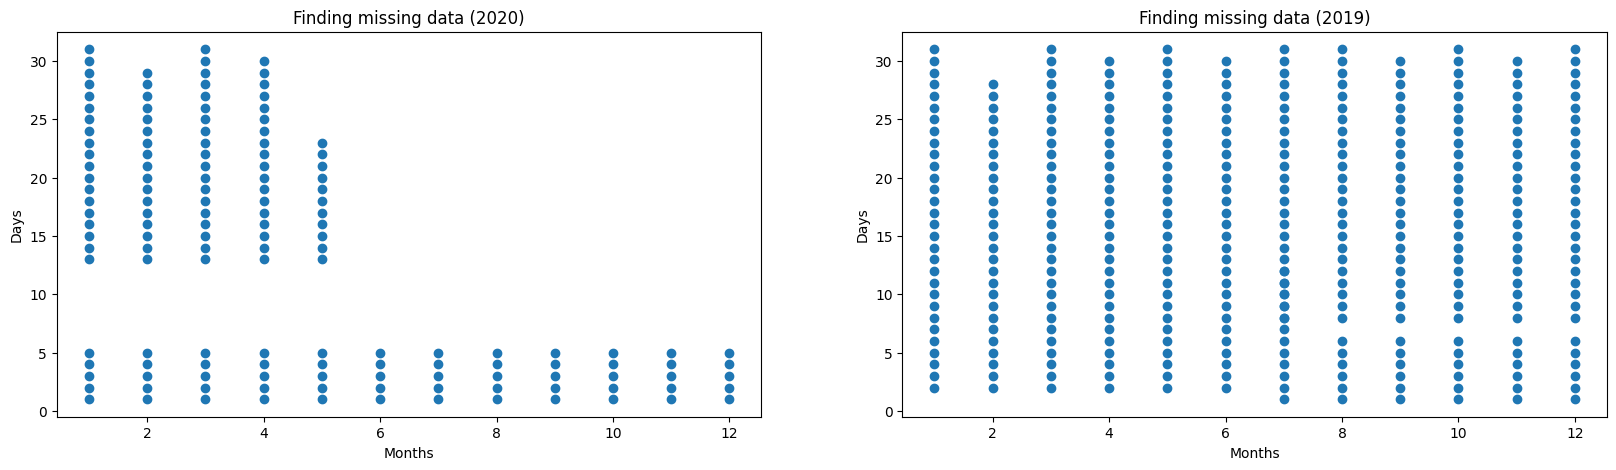

In [5]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize = (20,5))

x2020 = df[(df["year"] == 2020)&(df["States"] == "Maharashtra")]['month']
y2020 = df[(df["year"] == 2020)&(df["States"] == "Maharashtra")]['day']
ax1.scatter(x2020,y2020)
ax1.set(title = "Finding missing data (2020)",
xlabel = "Months",
ylabel = "Days");

x2019 = df[(df["year"] == 2019)&(df["States"] == "Maharashtra")]['month']
y2019 = df[(df["year"] == 2019)&(df["States"] == "Maharashtra")]['day']
ax2.scatter(x2019,y2019)
ax2.set(title = "Finding missing data (2019)",
xlabel = "Months",
ylabel = "Days");

In [6]:
df[(df["year"] == 2020)& (df["States"] == "Maharashtra")].head(15)

,States,Regions,latitude,longitude,Dates,Usage,year,month,day
11859,Maharashtra,WR,19.250232,73.160175,2020-01-01,377.8,2020,1,1
11892,Maharashtra,WR,19.250232,73.160175,2020-01-02,383.5,2020,1,2
11925,Maharashtra,WR,19.250232,73.160175,2020-01-03,390.7,2020,1,3
11958,Maharashtra,WR,19.250232,73.160175,2020-01-04,382.4,2020,1,4
11991,Maharashtra,WR,19.250232,73.160175,2020-01-05,487.6,2020,1,5
12024,Maharashtra,WR,19.250232,73.160175,2020-01-13,430.1,2020,1,13
12057,Maharashtra,WR,19.250232,73.160175,2020-01-14,465.5,2020,1,14
12090,Maharashtra,WR,19.250232,73.160175,2020-01-15,482.4,2020,1,15
12123,Maharashtra,WR,19.250232,73.160175,2020-01-16,482.7,2020,1,16
12156,Maharashtra,WR,19.250232,73.160175,2020-01-17,476.3,2020,1,17


##### Removing Data after April 2020

In [7]:

df.drop(["Regions","latitude","longitude"],axis=1,inplace = True)

In [8]:
df.head()

,States,Dates,Usage,year,month,day
0,Punjab,2019-01-02,119.9,2019,1,2
1,Haryana,2019-01-02,130.3,2019,1,2
2,Rajasthan,2019-01-02,234.1,2019,1,2
3,Delhi,2019-01-02,85.8,2019,1,2
4,UP,2019-01-02,313.9,2019,1,2


In [9]:
df = df[df["Dates"] < "2020-05-1"]

In [10]:
df[(df["year"] == 2020)&(df["States"] == "Maharashtra")].tail()

,States,Dates,Usage,year,month,day
14763,Maharashtra,2020-04-26,500.4,2020,4,26
14796,Maharashtra,2020-04-27,495.4,2020,4,27
14829,Maharashtra,2020-04-28,492.8,2020,4,28
14862,Maharashtra,2020-04-29,494.2,2020,4,29
14895,Maharashtra,2020-04-30,485.7,2020,4,30


In [11]:
states = df["States"].unique()
states

array(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype=object)

In [12]:
month_mean2020 = {}
for state in states:
    mean_usage = []
    for i in range (1,5):
        mean_usage.append(df[(df["year"] == 2020)&(df["month"] == i)&(df["States"] == state)]["Usage"].mean())
    
    month_mean2020[state] = mean_usage


month_mean2020["Maharashtra"]
    

[443.6583333333333, 439.04545454545456, 400.0208333333333, 431.89130434782606]

In [13]:
df.drop(["Dates"],inplace=True, axis = 1)
for state in states:
    for i in range(1,5):
        for j in range(6,13):
            usage = month_mean2020[state][i-1]
            df.loc[len(df.index)] = [state,usage,2020,i,j]

In [14]:
df["Dates"] = pd.to_datetime(df[["year","month","day"]])

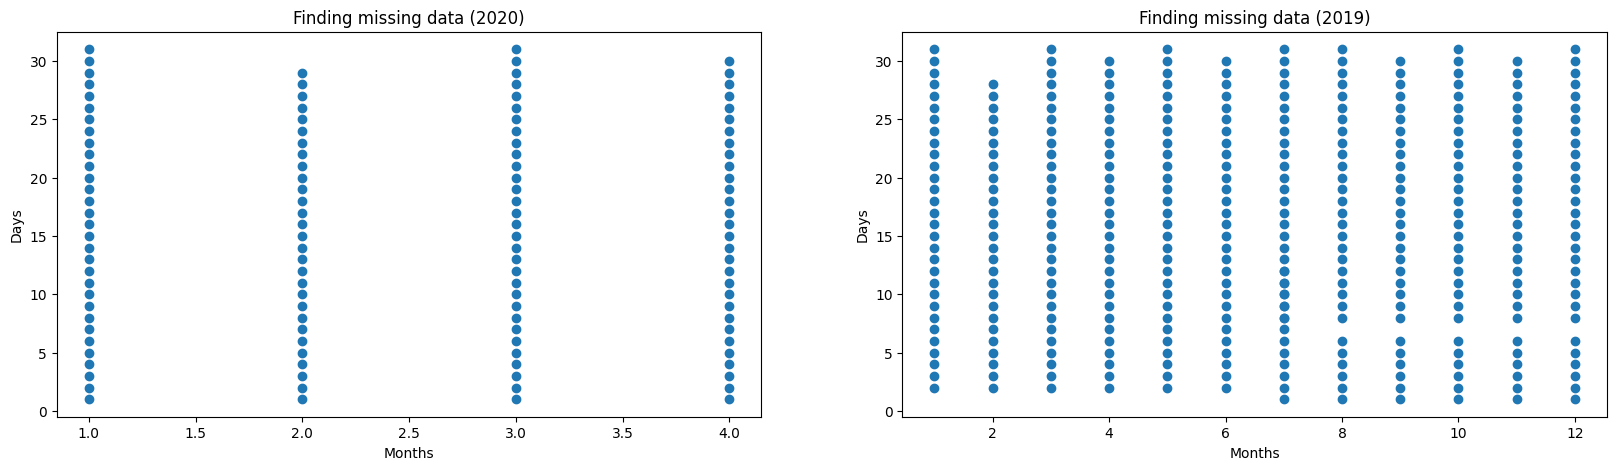

In [15]:
df.sort_values(by = ["Dates"],inplace = True)
df.reset_index(drop=True,inplace=True)

fig,((ax1,ax2)) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize = (20,5))

x2020 = df[(df["year"] == 2020)&(df["States"] == "Maharashtra")]['month']
y2020 = df[(df["year"] == 2020)&(df["States"] == "Maharashtra")]['day']
ax1.scatter(x2020,y2020)
ax1.set(title = "Finding missing data (2020)",
xlabel = "Months",
ylabel = "Days");

x2019 = df[(df["year"] == 2019)&(df["States"] == "Maharashtra")]['month']
y2019 = df[(df["year"] == 2019)&(df["States"] == "Maharashtra")]['day']
ax2.scatter(x2019,y2019)
ax2.set(title = "Finding missing data (2019)",
xlabel = "Months",
ylabel = "Days");

In [16]:
len(df)

15840

In [17]:
df.head()

,States,Usage,year,month,day,Dates
0,Punjab,119.9,2019,1,2,2019-01-02
1,Tripura,3.4,2019,1,2,2019-01-02
2,Nagaland,2.2,2019,1,2,2019-01-02
3,Mizoram,1.9,2019,1,2,2019-01-02
4,Meghalaya,6.1,2019,1,2,2019-01-02


### Model Training

In [18]:
df.dtypes

States            object
Usage            float64
year               int64
month              int64
day                int64
Dates     datetime64[ns]
dtype: object

In [19]:
# Converting states to numerical categories

df["States"] = df["States"].astype("category").cat.as_ordered()
df.head()

,States,Usage,year,month,day,Dates
0,Punjab,119.9,2019,1,2,2019-01-02
1,Tripura,3.4,2019,1,2,2019-01-02
2,Nagaland,2.2,2019,1,2,2019-01-02
3,Mizoram,1.9,2019,1,2,2019-01-02
4,Meghalaya,6.1,2019,1,2,2019-01-02


In [20]:
df.dtypes

States          category
Usage            float64
year               int64
month              int64
day                int64
Dates     datetime64[ns]
dtype: object

In [21]:
df["States"].cat.categories

Index(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'DNH', 'Delhi', 'Goa', 'Gujarat', 'HP', 'Haryana',
       'J&K', 'Jharkhand', 'Karnataka', 'Kerala', 'MP', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pondy',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'UP', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [23]:
state_codes = df["States"].cat.codes
state_codes

0        24
1        29
2        21
3        20
4        19
         ..
15835     6
15836     0
15837    28
15838     9
15839    24
Length: 15840, dtype: int8

In [24]:
df["year"].value_counts()

year
2019    11847
2020     3993
Name: count, dtype: int64